# Exercise 05


## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forecast the next 6 months of the sales logarithm
- Predict the next 6 months of sales

 <h2>Camilo Angarita: 201111642
    <br>
 Carolina Padilla: 201111402 
    <br>
 Jaime Orjuela: 201924252
    <br>
 David Tavera: 201016123
    </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_squared_error

Importing plotly failed. Interactive plots will not work.


In [2]:
passengers = pd.read_csv('../datasets/AirPassengers.csv')
retail = pd.read_csv('../datasets/example_retail_sales.csv')
df = pd.DataFrame()
df['ds'] = pd.to_datetime(passengers['Month'])
df['y'] = passengers['#Passengers']
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
X = df.values
size = int(len(X) * 0.9)
train, test = df[0:size], df[size:len(X)]
l1=len(train)
l2=len(test)
history=train
predictions = list()
print('l1: ',l1,'l2: ',l2)

l1:  129 l2:  15


In [8]:
model = Prophet()#ARIMA(history, order=(6,1,0))
for t in range(len(test)):
    model_fit = model.fit(history)
    future = model_fit.make_future_dataframe(periods=1, freq='M')
    future = future.iloc[[len(history)]]
    forecast = model_fit.predict(future)
    yhat = forecast[['yhat']]
    predictions.append(yhat.iloc[0,0])
    obs = test.iloc[[t]]
    history=history.append(obs)
    print("nueva longitud:",len(history))
    #print('predicted=%f, expected=%f' % (yhat.iloc[0,0], obs.iloc[0,0]))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 130


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 131


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 132


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 133


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 134


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 135


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 136


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 137


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 138


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 139


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 140


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 141
nueva longitud: 142


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


nueva longitud: 143
nueva longitud: 144


In [9]:
test.loc[:,'y'].to_list()

[407, 362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]

In [10]:
predictions

[410.8931617597958,
 386.4695573874677,
 420.94898354970906,
 426.97390504503295,
 425.79884208850495,
 453.47135583914104,
 441.99162283797506,
 449.73171919973197,
 485.5302313912178,
 536.9678417186549,
 543.9841800199262,
 497.9136585383293,
 460.59888273233855,
 429.03497241401027,
 455.6584695997398]

In [12]:
error = mean_squared_error(test.loc[:,'y'].to_list(), predictions)**0.5
error

36.45383256656269

In [13]:
future = model_fit.make_future_dataframe(periods=12 * 6, freq='M')
future.tail()

,ds
210,1966-06-30
211,1966-07-31
212,1966-08-31
213,1966-09-30
214,1966-10-31


In [14]:
forecast = model_fit.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
210,1966-06-30,763.955993,734.624847,794.396881
211,1966-07-31,762.239029,732.214624,794.091562
212,1966-08-31,717.127834,687.446023,747.742666
213,1966-09-30,680.054969,647.904174,708.876287
214,1966-10-31,651.525204,619.775512,683.700697


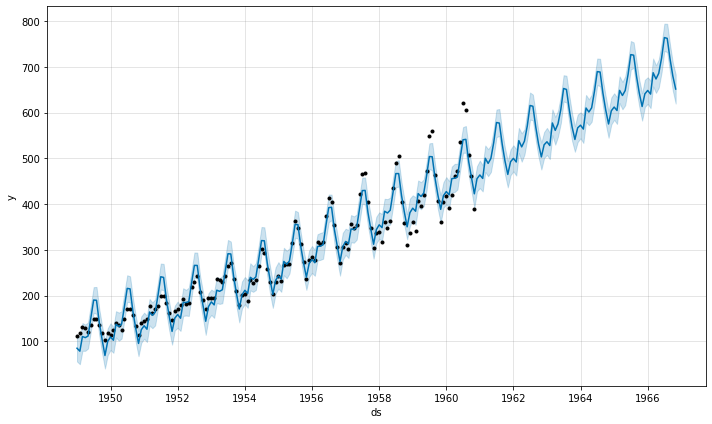

In [15]:
fig1 = model_fit.plot(forecast)